In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns

file_name = 'predictions.csv'
with open(file_name, 'rb') as f:
    d = pickle.load(f)
    
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
symbols_list.remove('scbtc')

In [11]:
%load_ext autoreload
%autoreload 1
from utils.hourly_volas_and_dt import hourly_volas_and_dt
%aimport utils.hourly_volas_and_dt

In [5]:
model = 'HAR+I'

In [33]:
input_folder_name = "full_returns_winsorised"

In [54]:
df_dict = dict()
for symbol in symbols_list:
    cal = d[symbol][model, 'Calendar']
    roll = d[symbol][model, 'Rolling']
    actual = hourly_volas_and_dt(symbol, input_folder_name).groupby(pd.Grouper(freq="D")).sum()
    actual = actual[1096 - 701: 1096]
    test_dict = {'cal': cal, 'roll': roll, 'actual': actual}
    actual['cal'] = cal
    actual['roll'] = roll
    actual.rename(columns={symbol : 'actual'}, inplace=True)
    actual.reset_index(inplace=True)
    actual.rename(columns={'index' : 'date'}, inplace=True)
    df_dict[symbol] = actual

In [55]:
df = pd.concat(df_dict)

In [57]:
df

date    actual       cal      roll
bnbbtc 0   2020-05-30  0.000462  0.000550  0.000517
       1   2020-05-31  0.000746  0.000535  0.000534
       2   2020-06-01  0.000702  0.000678  0.000650
       3   2020-06-02  0.000498  0.000954  0.000909
       4   2020-06-03  0.000264  0.000628  0.000579
...               ...       ...       ...       ...
repbtc 696 2022-04-26  0.000400  0.001215  0.001044
       697 2022-04-27  0.000809  0.001174  0.000986
       698 2022-04-28  0.000854  0.001323  0.001114
       699 2022-04-29  0.000800  0.001357  0.001167
       700 2022-04-30  0.000547  0.001012  0.000874

[16123 rows x 4 columns]

In [58]:
molten = pd.melt(df, id_vars=['date'], value_vars=['actual', 'cal', 'roll'])

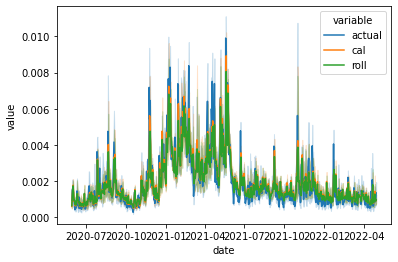

In [63]:
plt = sns.lineplot(data=molten, x='date', y='value', hue='variable')

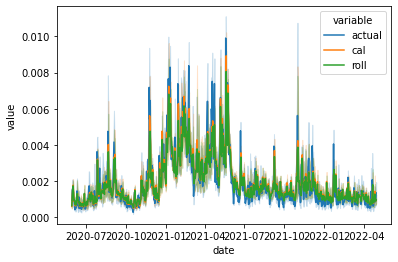

In [64]:
plt.figure

In [ ]:
plt = sns.lineplot(data=molten, x='date', y='value')

In [65]:
figure_path = 'results/hari_predictions_and_actual.png'
plt.figure.savefig(figure_path, bbox_inches='tight', dpi=300)

<AxesSubplot:>

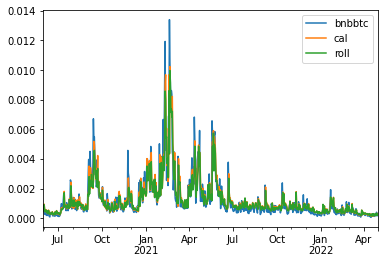

In [32]:
actual.plot()

In [25]:
dft = pd.DataFrame(test_dict)

ValueError: Data must be 1-dimensional

In [14]:
len(cal)

701

In [15]:
len(roll)

701

In [17]:
len(actual)

1096

In [18]:
len(actual[1096 - 701: 1096])

701